# LLM LoRA fine-tuning

⚠️ **IMPORTANT:** Before running this notebook, copy it into your user directory at `user/<your-username>/`.  
This ensures that any output or intermediate checkpoints are stored in your personal workspace.

Once copied, follow the environment setup instructions in the [README.md](./README.md), and connect this notebook to the `.venv` environment you created during setup.

In [ ]:
from finetune import (
    CONFIGS,
    get_device,
    load_and_prepare_dataset,
    tokenize_dataset,
    create_lora_model,
    run_experiment,
)


In [ ]:
# choose config
config = CONFIGS["quick"]  # or "full"
device = get_device()
print(f"Running LoRA fine-tuning on {config['dataset_name']} ({config['model_name']})")


Running LoRA fine-tuning on rotten_tomatoes (roberta-base)


In [ ]:
# load and tokenize data
dataset, text_field = load_and_prepare_dataset(config["dataset_name"])
tokenized_dataset, tokenizer = tokenize_dataset(
    dataset, text_field, config["model_name"], config["max_length"]
)


Tokenizing: 100%|██████████| 1066/1066 [00:00<00:00, 13206.86 examples/s]


In [ ]:
print(f"Train count: {len(dataset['train'])}")
print(f"Validation count: {len(dataset['validation'])}")
print(f"Test count: {len(dataset['test'])}")


Train count: 8530
Validation count: 1066
Test count: 1066


In [ ]:
# create and train LoRA model
lora_alpha = config["lora_rank"] * config["lora_alpha_ratio"]
model = create_lora_model(
    config["model_name"],
    config["num_labels"],
    rank=config["lora_rank"],
    alpha=lora_alpha,
)

results, model = run_experiment(
    model=model,
    device=device,
    tokenized_dataset=tokenized_dataset,
    config=config,
    experiment_name="LoRA Fine-Tuning",
    learning_rate=config["learning_rate_lora"],
    is_full_finetuning=False,
)

print("\n=== LoRA Fine-Tuning Results ===")
for k, v in results.items():
    print(f"{k:20s}: {v}")


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.336800,0.324886,0.873358
2,0.283000,0.310600,0.877111
3,0.250900,0.318228,0.878987



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning
training_time       : 77.28436160087585
train_loss          : 0.34259866403134426
eval_loss           : 0.3182283341884613
eval_accuracy       : 0.8789868667917449
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031


In [ ]:
aggregated_results = {}


In [ ]:
def experiment_with_config(config, name):
    lora_alpha = config["lora_rank"] * config["lora_alpha_ratio"]
    model = create_lora_model(
        config["model_name"],
        config["num_labels"],
        rank=config["lora_rank"],
        alpha=lora_alpha,
    )

    results, model = run_experiment(
        model=model,
        device=device,
        tokenized_dataset=tokenized_dataset,
        config=config,
        experiment_name=f"LoRA Fine-Tuning {name}",
        learning_rate=config["learning_rate_lora"],
        is_full_finetuning=False,
    )

    print("\n=== LoRA Fine-Tuning Results ===")
    for k, v in results.items():
        print(f"{k:20s}: {v}")
        
    aggregated_results[name] = results


In [ ]:
# Change rank
ranks = [4, 16]
for r in ranks:
    config['lora_rank'] = r
    print(f"Running LoRa experiment with rank: {r}")
    experiment_with_config(config, f"rank_#{r}")

# reset 
config['lora_rank'] = 8


Running LoRa experiment with rank: 4


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.333900,0.331266,0.873358
2,0.285300,0.308516,0.880863
3,0.262000,0.318664,0.881801



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning
training_time       : 77.09714150428772
train_loss          : 0.3425494897901342
eval_loss           : 0.3186638653278351
eval_accuracy       : 0.8818011257035647
total_params        : 126064475
trainable_params    : 1418843
trainable_percentage: 1.1254899526611284
Running LoRa experiment with rank: 16


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.340400,0.339963,0.863977
2,0.277900,0.311496,0.878049
3,0.253900,0.318829,0.873358



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning
training_time       : 76.59887504577637
train_loss          : 0.3303702835286601
eval_loss           : 0.31882914900779724
eval_accuracy       : 0.873358348968105
total_params        : 126617435
trainable_params    : 1971803
trainable_percentage: 1.5572918532112106


In [ ]:
# Change rank
alpha_ratios = [1, 4]
for alpha in alpha_ratios:
    config['lora_alpha_ratio'] = alpha
    print(f"Running LoRa experiment with lora_alpha_ratio: {alpha}")
    experiment_with_config(config, f"alpha_ratio_{alpha}")

# reset 
config['lora_alpha_ratio'] = 2


Running LoRa experiment with lora_alpha_ratio: 1


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.332000,0.329816,0.874296
2,0.287900,0.313860,0.880863
3,0.264600,0.319571,0.881801



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning alpha_ratio_#1
training_time       : 76.61677813529968
train_loss          : 0.3424406610847859
eval_loss           : 0.31957119703292847
eval_accuracy       : 0.8818011257035647
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031
Running LoRa experiment with lora_alpha_ratio: 4


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.329500,0.318710,0.860225
2,0.279400,0.311872,0.879925
3,0.245100,0.322991,0.881801



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning alpha_ratio_#4
training_time       : 77.2156753540039
train_loss          : 0.32420537774259234
eval_loss           : 0.3229914605617523
eval_accuracy       : 0.8818011257035647
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031


In [ ]:
# Change learning rate
learning_rates = [1e-3, 1e-5]
for lr in learning_rates:
    config['learning_rate_lora'] = lr
    print(f"Running LoRa experiment with lr: {lr}")
    experiment_with_config(config, f"lr_{lr}")

# reset 
config['learning_rate_lora'] = 1e-4


Running LoRa experiment with lr: 0.001


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.321400,0.346933,0.864916
2,0.240000,0.357758,0.879925
3,0.169200,0.365315,0.882739



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning lr_0.001
training_time       : 78.88916420936584
train_loss          : 0.28273569733909004
eval_loss           : 0.36531516909599304
eval_accuracy       : 0.8827392120075047
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031
Running LoRa experiment with lr: 1e-05


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.684800,0.676938,0.681051
2,0.380000,0.380315,0.837711
3,0.356400,0.376373,0.843340



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning lr_1e-05
training_time       : 77.60393452644348
train_loss          : 0.518631591034888
eval_loss           : 0.3763725459575653
eval_accuracy       : 0.8433395872420263
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031


In [ ]:
# Change batch size
batch_sizes = [32, 64]
for batch_size in batch_sizes:
    config['batch_size'] = batch_size
    print(f"Running LoRa experiment with batch_size: {batch_size}")
    experiment_with_config(config, f"batch_size_{batch_size}")

# reset 
config['batch_size'] = 16


Running LoRa experiment with batch_size: 32


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.422200,0.326636,0.868668
2,0.294300,0.315601,0.880863
3,0.265300,0.318736,0.878049



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning batch_size_32
training_time       : 64.67944359779358
train_loss          : 0.35670765017748773
eval_loss           : 0.3187359571456909
eval_accuracy       : 0.8780487804878049
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031
Running LoRa experiment with batch_size: 64


Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.677700,0.361691,0.848030
2,0.360700,0.315983,0.872420
3,0.277700,0.325674,0.878049



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning batch_size_64
training_time       : 64.47414469718933
train_loss          : 0.4057346727717575
eval_loss           : 0.3256739675998688
eval_accuracy       : 0.8780487804878049
total_params        : 126248795
trainable_params    : 1603163
trainable_percentage: 1.269844199305031


In [26]:
multiple_params_config = {
    "dataset_name": "rotten_tomatoes",
    "model_name": "roberta-base",
    "max_length": 128,
    "num_labels": 2,
    "num_epochs": 5,
    "batch_size": 32,
    "learning_rate_full": 2e-5,
    "learning_rate_lora": 1e-4,
    "lora_rank": 16,
    "lora_alpha_ratio": 2,
    "description": "Quick experiment: Rotten Tomatoes + RoBERTa-base",
}
experiment_with_config(multiple_params_config, "multiple_params")



Some weights of RobertaAdapterModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['heads.default.3.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
There are adapters available but none are activated for the forward pass.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.414800,0.330184,0.863039
2,0.296000,0.322498,0.874296
3,0.262500,0.331521,0.880863
4,0.249600,0.326971,0.880863
5,0.230200,0.329019,0.885553



=== LoRA Fine-Tuning Results ===
experiment_name     : LoRA Fine-Tuning multiple_params
training_time       : 145.02326011657715
train_loss          : 0.3070138141903538
eval_loss           : 0.3290186822414398
eval_accuracy       : 0.8855534709193246
total_params        : 126617435
trainable_params    : 1971803
trainable_percentage: 1.5572918532112106


Max accuracy: 88.55534709193246


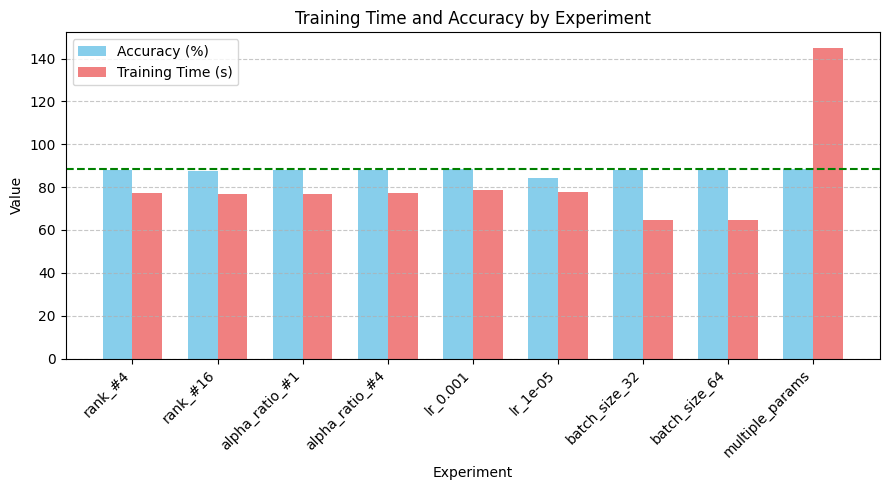

In [34]:
import numpy as np
import matplotlib.pyplot as plt

names = list(aggregated_results.keys())
accuracies = [v["eval_accuracy"] * 100 for v in aggregated_results.values()]
times = [v["training_time"] for v in aggregated_results.values()]
x = np.arange(len(names))

width = 0.35
fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy (%)', color='skyblue')
bars2 = ax.bar(x + width/2, times, width, label='Training Time (s)', color='lightcoral')

# Labels
ax.set_ylabel('Value')
ax.set_xlabel('Experiment')
ax.set_title('Training Time and Accuracy by Experiment')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Draw max accuracy
max_acc = max(accuracies)
print(f'Max accuracy: {max_acc}')
ax.axhline(y=max_acc, color='green', linestyle='--', linewidth=1.5, label='Best accuracy')

plt.tight_layout()
plt.show()


Observations:
- No significant difference in accuracy.
- Increasing batch size reduces training time the most, likely at the cost of higher memory usage.
- The last experiment ran for twice as many epochs, so the longer training time is expected.